In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [312]:
# Create a toy classification dataset
X, y = make_classification(
    n_samples=500, n_features=2, 
    n_informative=2, n_redundant=0, flip_y=.4, 
    n_clusters_per_class=1, random_state=42
)

In [313]:
# Convert to DataFrame
df = pd.DataFrame({
    'X': X[:, 0], 
    'y': y
})

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [315]:
print(df.shape)
df.sample(10)

(500, 2)


,X,y
138,0.181659,1
223,0.534229,0
445,1.874566,0
382,1.734988,1
120,0.906154,1
303,1.704020,0
328,1.021370,1
14,2.025322,1
324,0.874237,0
420,0.967066,1


In [316]:
df['y'].value_counts()

y
1    257
0    243
Name: count, dtype: int64

In [317]:
# Step 1: Suppose Loss function is Logistic loss then prediction for model1 is log(odds)
print(np.log(92/108))

# Convert into probability
p = np.exp(-0.16034265007517937) / (1 + np.exp(-0.16034265007517937))
print(p)

df['y_pred0'] = p

df.sample(10)

-0.16034265007517937
0.46


,X,y,y_pred0
352,1.216422,1,0.46
359,1.546518,1,0.46
296,-0.500664,1,0.46
351,1.023496,1,0.46
20,1.370525,1,0.46
382,1.734988,1,0.46
117,1.319323,1,0.46
95,1.185684,0,0.46
152,0.091172,0,0.46
186,1.398478,1,0.46


In [318]:
# Step 2: Calculate the error(residual), residual = actual - predicted
df['res1'] = df['y'] - df['y_pred0']
df.sample(10)

,X,y,y_pred0,res1
355,1.568961,0,0.46,-0.46
118,1.654986,1,0.46,0.54
275,-0.024217,0,0.46,-0.46
484,2.841457,1,0.46,0.54
203,0.653097,1,0.46,0.54
106,1.233440,1,0.46,0.54
38,0.209128,1,0.46,0.54
436,1.839760,1,0.46,0.54
262,0.290071,0,0.46,-0.46
155,0.646983,1,0.46,0.54


In [319]:
# Now, Train model2 uaing X and target as (res1) insted of y
t1 = DecisionTreeRegressor(max_depth=3)

t1.fit(df[['X']], df[['res1']])

DecisionTreeRegressor(max_depth=3)

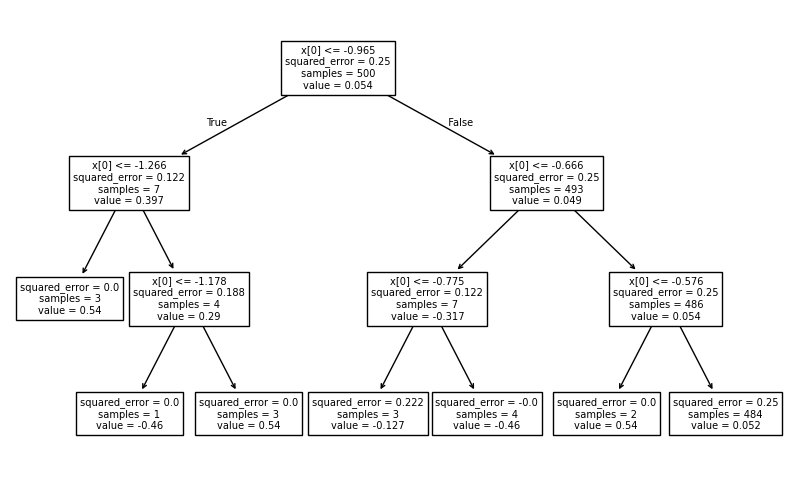

In [320]:
plt.figure(figsize=(10, 6))
plot_tree(t1)
plt.show()

In [321]:
df['leaf_index1'] = t1.apply(df[['X']])
df.head(10)

,X,y,y_pred0,res1,leaf_index1
0,2.260020,0,0.46,-0.46,12
1,1.147438,0,0.46,-0.46,12
2,1.131394,0,0.46,-0.46,12
3,-1.217647,0,0.46,-0.46,4
4,0.595505,1,0.46,0.54,12
5,1.491764,1,0.46,0.54,12
6,-0.372524,0,0.46,-0.46,12
7,1.218545,1,0.46,0.54,12
8,1.229876,1,0.46,0.54,12
9,1.108942,1,0.46,0.54,12


In [322]:
def return_logs(leaf):
  num = df[df['leaf_index1'] == leaf]['res1'].sum()
  den = sum(df[df['leaf_index1'] == leaf]['y_pred0'] * (1 - df[df['leaf_index1'] == leaf]['y_pred0']))
  return round(num/den, 2)

In [323]:
df['log1'] = df['leaf_index1'].apply(return_logs)
df

,X,y,y_pred0,res1,leaf_index1,log1
0,2.260020,0,0.46,-0.46,12,0.21
1,1.147438,0,0.46,-0.46,12,0.21
2,1.131394,0,0.46,-0.46,12,0.21
3,-1.217647,0,0.46,-0.46,4,-1.85
4,0.595505,1,0.46,0.54,12,0.21
...,...,...,...,...,...,...
495,1.247150,0,0.46,-0.46,12,0.21
496,1.658410,0,0.46,-0.46,12,0.21
497,1.884132,0,0.46,-0.46,12,0.21
498,2.058359,1,0.46,0.54,12,0.21


In [324]:
# Log of odds
df['y_pred2'] = -0.024 + df['log1']

In [325]:
# Converting pred1 into probability
df['y_pred2'] = np.exp(df['y_pred2'])/(1 + np.exp(df['y_pred2']))
df

,X,y,y_pred0,res1,leaf_index1,log1,y_pred2
0,2.260020,0,0.46,-0.46,12,0.21,0.546366
1,1.147438,0,0.46,-0.46,12,0.21,0.546366
2,1.131394,0,0.46,-0.46,12,0.21,0.546366
3,-1.217647,0,0.46,-0.46,4,-1.85,0.133080
4,0.595505,1,0.46,0.54,12,0.21,0.546366
...,...,...,...,...,...,...,...
495,1.247150,0,0.46,-0.46,12,0.21,0.546366
496,1.658410,0,0.46,-0.46,12,0.21,0.546366
497,1.884132,0,0.46,-0.46,12,0.21,0.546366
498,2.058359,1,0.46,0.54,12,0.21,0.546366


In [326]:
df['res2'] = df['y'] - df['y_pred2']
df

,X,y,y_pred0,res1,leaf_index1,log1,y_pred2,res2
0,2.260020,0,0.46,-0.46,12,0.21,0.546366,-0.546366
1,1.147438,0,0.46,-0.46,12,0.21,0.546366,-0.546366
2,1.131394,0,0.46,-0.46,12,0.21,0.546366,-0.546366
3,-1.217647,0,0.46,-0.46,4,-1.85,0.133080,-0.133080
4,0.595505,1,0.46,0.54,12,0.21,0.546366,0.453634
...,...,...,...,...,...,...,...,...
495,1.247150,0,0.46,-0.46,12,0.21,0.546366,-0.546366
496,1.658410,0,0.46,-0.46,12,0.21,0.546366,-0.546366
497,1.884132,0,0.46,-0.46,12,0.21,0.546366,-0.546366
498,2.058359,1,0.46,0.54,12,0.21,0.546366,0.453634
